In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam_ham_dataset.csv')

In [3]:
df.sample(5)

,Unnamed: 0,label,text,label_num
2847,4687,spam,Subject: save a bundle on meds !\r\nfont color...,1
2353,2159,ham,Subject: texas general land office it transpor...,0
4780,1804,ham,"Subject: gas management agreement\r\ndaren ,\r...",0
4578,434,ham,Subject: re : allocation exceptions\r\ndaren o...,0
3212,1980,ham,Subject: sodbuster . . . what ' s up man\r\nhe...,0


In [4]:
df.shape

(5171, 4)

In [5]:
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## 1.Data Cleaning ## 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [7]:
df=df.drop(columns=['Unnamed: 0'])

In [8]:
df.head(5)

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [9]:
df=df.rename(columns={
    'text' : 'message',
    'label_num' : 'label',
    'label' : 'label_text'
}) 

In [10]:
#missing values
df.isnull().sum()

label_text    0
message       0
label         0
dtype: int64

In [11]:
#Check for duplicate value:
df.duplicated().sum()

np.int64(178)

In [12]:
#remove duplicates:
df = df.drop_duplicates(keep='first')  #drop_duplicates() does not remove repeated values in a column.It only removes a row if the entire row is an exact duplicate of another row.

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(4993, 3)

## 2.EDA ##

In [15]:
df.head()

,label_text,message,label
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [16]:
df['label'].value_counts()

label
0    3531
1    1462
Name: count, dtype: int64

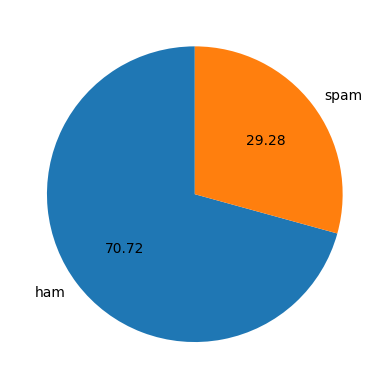

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f",startangle=90)
plt.show()

In [18]:
#Data is imbalance

In [19]:
!pip install nltk


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import nltk
# nltk stands for Natural Language Toolkit.
# It is a popular Python library used for Natural Language Processing (NLP) — that means working with text data such as emails, messages, reviews, etc.

In [21]:
nltk.download('punkt')   #nltk.download('punkt') is required because Punkt is a pre-trained tokenizer model that NLTK uses to split text into sentences and words.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mantasha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Mantasha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
df['message']

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: message, Length: 4993, dtype: object

In [23]:
df = df.reset_index(drop=True)  #as duplicate rows are removed but still index was not reset

In [24]:
df['message']

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
4988    Subject: fw : crosstex energy , driscoll ranch...
4989    Subject: put the 10 on the ft\r\nthe transport...
4990    Subject: 3 / 4 / 2000 and following noms\r\nhp...
4991    Subject: industrial worksheets for august 2000...
4992    Subject: important online banking alert\r\ndea...
Name: message, Length: 4993, dtype: object

In [25]:
df['message_length']=df['message'].apply(len)   #this will give each rows length,apply() executes a function on each value in a pandas Series.

In [26]:
df.head()

,label_text,message,label,message_length
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


Tokenizing means : splitting into words

In [27]:
#fetch num of words:
#first fetch the list
df['message'].apply(lambda x:nltk.word_tokenize(x))
# df['message'].apply(lambda x: x.split()) -- i can use this method as well

0       [Subject, :, enron, methanol, ;, meter, #, :, ...
1       [Subject, :, hpl, nom, for, january, 9, ,, 200...
2       [Subject, :, neon, retreat, ho, ho, ho, ,, we,...
3       [Subject, :, photoshop, ,, windows, ,, office,...
4       [Subject, :, re, :, indian, springs, this, dea...
                              ...                        
4988    [Subject, :, fw, :, crosstex, energy, ,, drisc...
4989    [Subject, :, put, the, 10, on, the, ft, the, t...
4990    [Subject, :, 3, /, 4, /, 2000, and, following,...
4991    [Subject, :, industrial, worksheets, for, augu...
4992    [Subject, :, important, online, banking, alert...
Name: message, Length: 4993, dtype: object

In [28]:
#then calculate the num of words using len:
df['num_of_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,label_text,message,label,message_length,num_of_words
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [30]:
df['No_of_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x))) #splits the list into sentences

In [31]:
df.head()

,label_text,message,label,message_length,num_of_words,No_of_sentences
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [32]:
df=df.drop(columns=['label_text'])

In [33]:
df.head()

,message,label,message_length,num_of_words,No_of_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [34]:
df[['message_length','num_of_words','No_of_sentences']].describe()

,message_length,num_of_words,No_of_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [35]:
df[df['label']==0]

,message,label,message_length,num_of_words,No_of_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3
5,Subject: ehronline web address change\r\nthis ...,0,480,99,7
...,...,...,...,...,...
4986,Subject: re : meter # : 1266 ; august 2000 / a...,0,5549,1468,28
4988,"Subject: fw : crosstex energy , driscoll ranch...",0,869,197,9
4989,Subject: put the 10 on the ft\r\nthe transport...,0,534,156,7
4990,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,306,13


In [36]:
#ham:
df[df['label']==0][['message_length','num_of_words','No_of_sentences']].describe()

,message_length,num_of_words,No_of_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [37]:
#spam:
df[df['label']==1][['message_length','num_of_words','No_of_sentences']].describe()

,message_length,num_of_words,No_of_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [38]:
#Comparing to ham messages;spam messages are more longer

In [39]:
import seaborn as sns

<Axes: xlabel='message_length', ylabel='Count'>

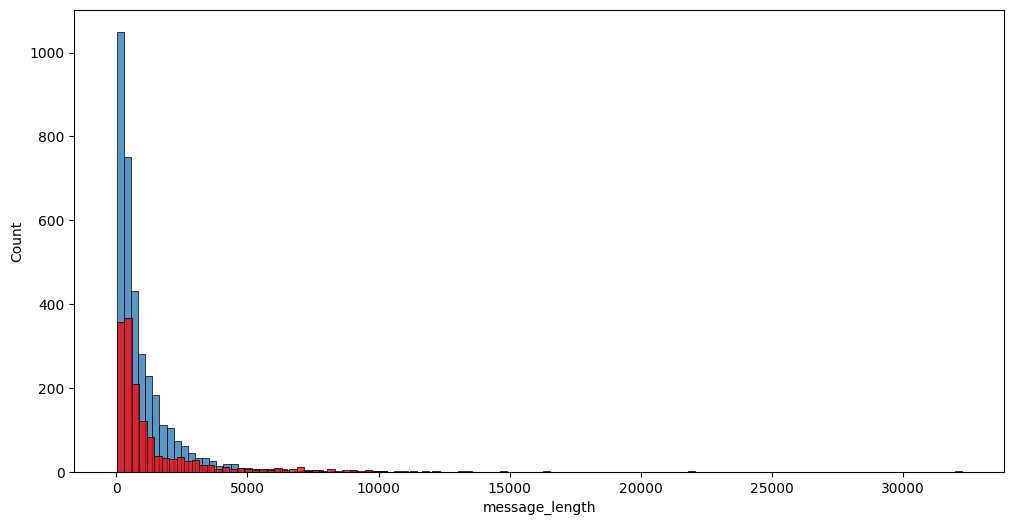

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['message_length'])
sns.histplot(df[df['label']==1]['message_length'],color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

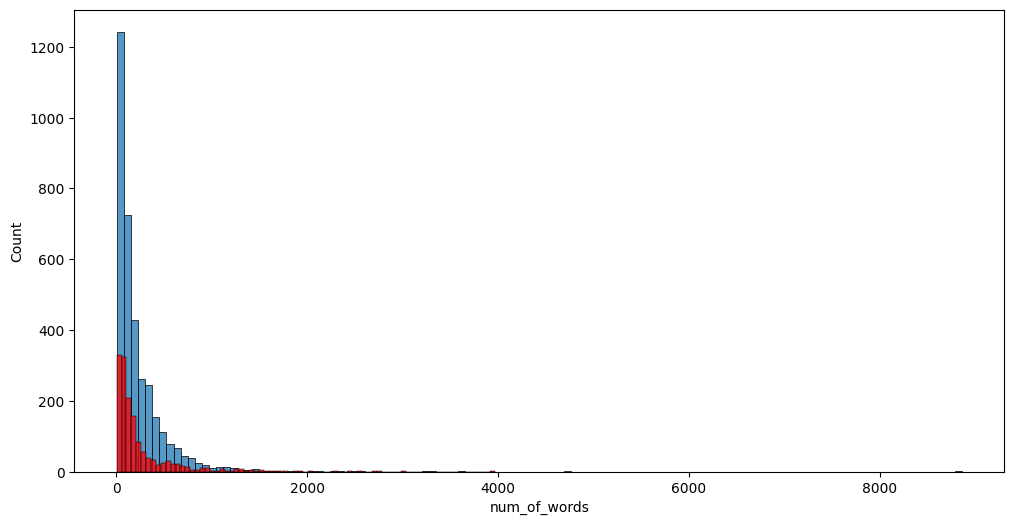

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['num_of_words'])
sns.histplot(df[df['label']==1]['num_of_words'],color='red')

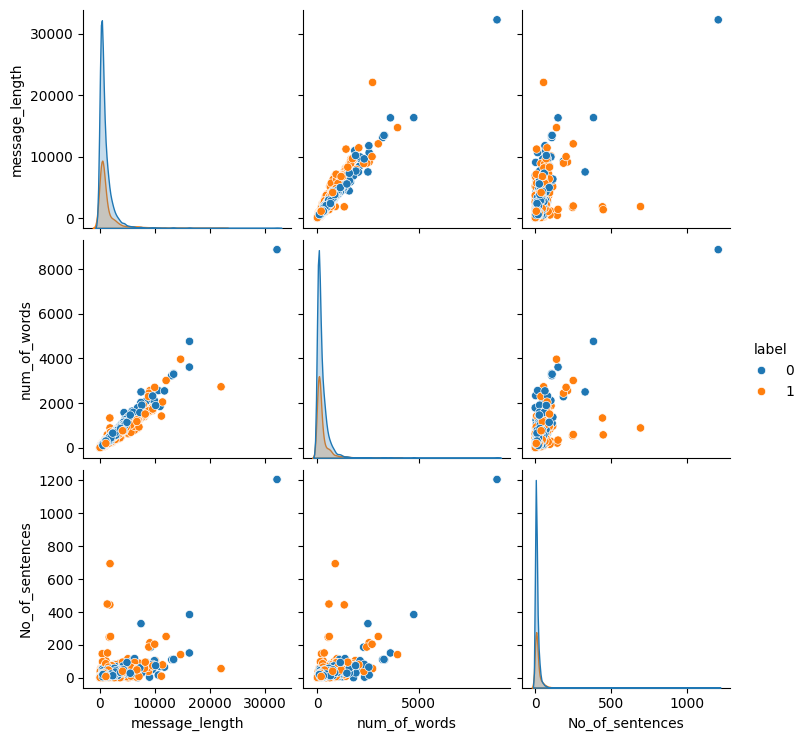

In [42]:
sns.pairplot(df,hue='label')

In [43]:
df.corr(numeric_only=True)

,label,message_length,num_of_words,No_of_sentences
label,1.000000,0.074794,0.014425,0.095863
message_length,0.074794,1.000000,0.970492,0.630026
num_of_words,0.014425,0.970492,1.000000,0.703256
No_of_sentences,0.095863,0.630026,0.703256,1.000000


<Axes: >

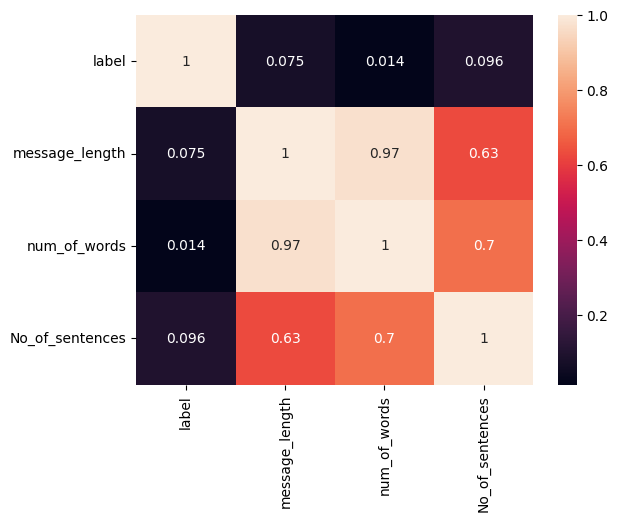

In [44]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

**3.Data Preprocessing**
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- stemming

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)    #not the text is converted to list
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
           y.append(i) 
    text = y[:] 
    y.clear()
    for i in text:
        y.append(ps.stem(i)) 
    return " ".join(y)

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mantasha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [50]:
transform_text(df['message'][0])

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [ ]:
df['transformed_message'] = df['message'].apply(transform_text)

In [52]:
df.head()

,message,label,message_length,num_of_words,No_of_sentences,transformed_message
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [53]:
!pip install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


A word cloud is a visual representation of text where:
- frequently occurring words appear larger
- less frequent words appear smaller
- It helps you quickly see the most common words in spam or ham messages.

In [54]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

### Explanation of WordCloud Generation Step-by-Step

1. **`df[df['label'] == 1]`**  
   - Filters the dataset to keep **only spam messages**.  
   - `label = 1` → spam  

2. **`['transformed_message']`**  
   - Selects the column containing the **cleaned and preprocessed text**,  
     such as lowercased, tokenized, stopwords removed, and stemmed text.

3. **`.str.cat(sep=" ")`**  
   - Concatenates all spam messages into **one large string**,  
     with spaces separating each message.  
   - WordCloud requires a single long string, not multiple rows.

4. **`wc.generate(...)`**  
   - Generates the word cloud from the combined text.  
   - Internally, WordCloud:  
     - Counts word frequencies  
     - Determines which words appear most often  
     - Builds the visual word cloud image  


In [55]:
spam_wc = wc.generate(df[df['label']==1]['transformed_message'].str.cat(sep=" "))

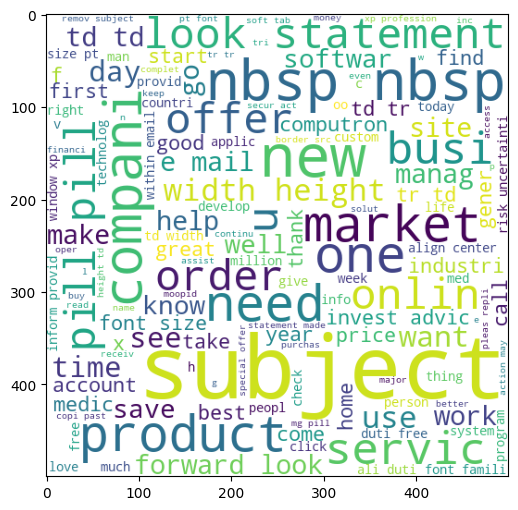

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)  #imshow() is image show

In [57]:
ham_wc = wc.generate(df[df['label']==0]['transformed_message'].str.cat(sep=" "))

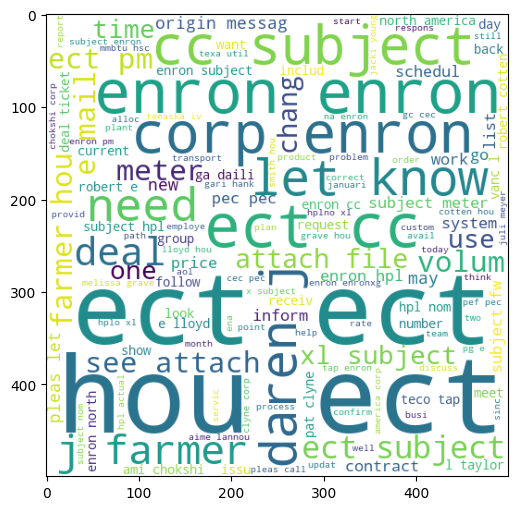

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)  #imshow() is image show

In [59]:
#Top 30 words of spam and ham messages:
df.head()

,message,label,message_length,num_of_words,No_of_sentences,transformed_message
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [60]:
#spam corpus:
spam_corpus = []
mess=df[df['label']==1]['transformed_message'].tolist()
for msg in mess:
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

196592

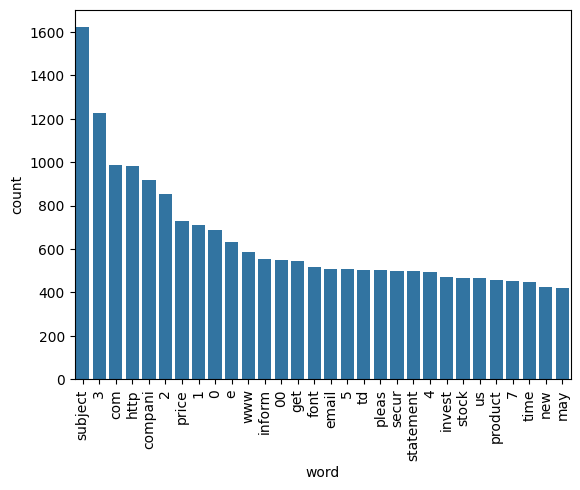

In [62]:
from collections import Counter

word_counts = Counter(spam_corpus).most_common(30)
df_wc = pd.DataFrame(word_counts, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_wc)
plt.xticks(rotation=90)
plt.show()

In [63]:
#ham corpus:
ham_corpus = []
mess=df[df['label']==0]['transformed_message'].tolist()
for msg in mess:
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
len(ham_corpus)

380475

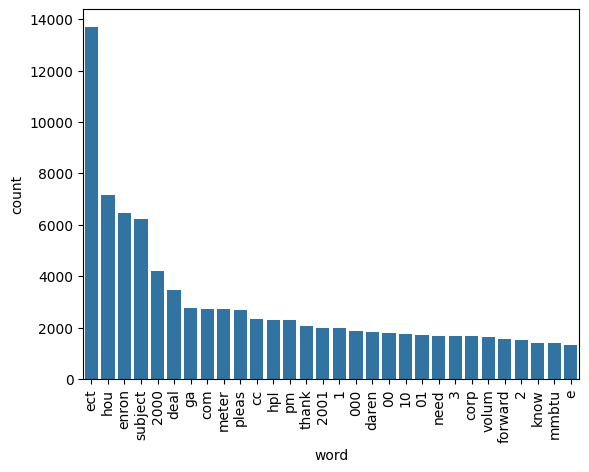

In [65]:
from collections import Counter

word_counts = Counter(ham_corpus).most_common(30)
df_wc = pd.DataFrame(word_counts, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_wc)
plt.xticks(rotation=90)
plt.show()

## 4.Model Building ##

In [66]:
#So we need number input to our model because any ml model takes number input and now we need to convert transformed message into numbers (vectorized it using bag of words)

- Sklearn(scikit-learn) is a Python library provides ready-to-use tools for preprocessing data, converting text to numbers, training machine-learning models, and evaluating their performance—all in a simple, consistent way.
- CountVectorizer() converts text into numerical form so a machine learning model can understand it.

In [67]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Feature extraction turns raw data into meaningful numeric representations for ML models.

In [91]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)  #for comparing whether i get the highest precision, accuracy or not ; we can pass here max features as well so that we can get only max used words by passing here (max_features=3000)

In [92]:
X = cv.fit_transform(df['transformed_message']).toarray()

- cv.fit_transform(...):
Learns all unique words in the dataset and converts each message into a vector of word counts (Bag-of-Words).

- toarray():
Converts the sparse matrix into a regular NumPy array.

- X:
Holds the final numerical representation of your text data.

In [93]:
X

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4993, 42592))

In [94]:
X.shape

(4993, 42592)

In [95]:
Y = df['label'].values

In [96]:
Y

array([0, 0, 0, ..., 0, 0, 1], shape=(4993,))

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Splits your dataset into training (80%) and testing (20%) sets.

- X_train → Training features

- X_test → Testing features

- Y_train → Training labels

- Y_test → Testing labels

- test_size=0.2 → 20% test data

- random_state=2 → Ensures same split every time (reproducibility)

Naive Bayes is a fast and simple machine-learning classifier that predicts categories based on probability using Bayes’ theorem.

In [99]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

| Model             | Used For          | Works Best With                                 |
| ----------------- | ----------------- | ----------------------------------------------- |
| **GaussianNB**    | Continuous values | e.g., real numbers                              |
| **MultinomialNB** | Count data        | e.g., word counts, TF-IDF (text classification) |
| **BernoulliNB**   | Binary features   | e.g., 0/1 values, presence/absence of words     |


Precision = Of all messages predicted as spam, how many were actually spam?

If precision is low →
📌 Many normal emails get marked as spam ❌
This is very bad because important emails might be lost.

So yes — precision is the #1 metric in spam classification.

In [100]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [101]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test , Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.9519519519519519
[[683  14]
 [ 34 268]]
0.950354609929078


I am using countvectorizer+multinomialNB

In [102]:
#recommended:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test , Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.970970970970971
[[680  17]
 [ 12 290]]
0.9446254071661238


In [103]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test , Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.8468468468468469
[[677  20]
 [133 169]]
0.8941798941798942


In [104]:
!pip install xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [106]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [107]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [108]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # 1. Train the classifier on the training data
    clf.fit(X_train, y_train)
    
    # 2. Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # 3. Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # 4. Return the calculated scores
    return accuracy, precision

In [109]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.8168168168168168, 0.7117437722419929)

In [110]:
accuracy_scores = []
precision_scores = []
    
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    
    print('For',name)
    print('Accuracy - ',current_accuracy)
    print('Precision - ',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy -  0.8168168168168168
Precision -  0.7117437722419929
For KN
Accuracy -  0.8448448448448449
Precision -  0.6666666666666666
For NB
Accuracy -  0.970970970970971
Precision -  0.9446254071661238
For DT
Accuracy -  0.8458458458458459
Precision -  0.672093023255814
For LR
Accuracy -  0.963963963963964
Precision -  0.9208860759493671
For RF
Accuracy -  0.972972972972973
Precision -  0.9508196721311475
For AdaBoost
Accuracy -  0.9099099099099099
Precision -  0.8117647058823529
For BgC
Accuracy -  0.948948948948949
Precision -  0.9114754098360656
For ETC
Accuracy -  0.975975975975976
Precision -  0.9455128205128205
For GBDT
Accuracy -  0.9379379379379379
Precision -  0.8726708074534162
For xgb
Accuracy -  0.9619619619619619
Precision -  0.9177215189873418


In [111]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [112]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.972973,0.950820
8,ETC,0.975976,0.945513
2,NB,0.970971,0.944625
4,LR,0.963964,0.920886
10,xgb,0.961962,0.917722
7,BgC,0.948949,0.911475
9,GBDT,0.937938,0.872671
6,AdaBoost,0.909910,0.811765
0,SVC,0.816817,0.711744
3,DT,0.845846,0.672093


## 5.Improving Model Performance  ##

In [114]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.972973
1,ETC,Accuracy,0.975976
2,NB,Accuracy,0.970971
3,LR,Accuracy,0.963964
4,xgb,Accuracy,0.961962
5,BgC,Accuracy,0.948949
6,GBDT,Accuracy,0.937938
7,AdaBoost,Accuracy,0.909910
8,SVC,Accuracy,0.816817
9,DT,Accuracy,0.845846


In [115]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [116]:
performance_df.merge(temp_df,on="Algorithm")

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,RF,0.972973,0.950820,0.972973,0.950820
1,ETC,0.975976,0.945513,0.975976,0.945513
2,NB,0.970971,0.944625,0.970971,0.944625
3,LR,0.963964,0.920886,0.963964,0.920886
4,xgb,0.961962,0.917722,0.961962,0.917722
5,BgC,0.948949,0.911475,0.948949,0.911475
6,GBDT,0.937938,0.872671,0.937938,0.872671
7,AdaBoost,0.909910,0.811765,0.909910,0.811765
8,SVC,0.816817,0.711744,0.816817,0.711744
9,DT,0.845846,0.672093,0.845846,0.672093


In [118]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))